In [1]:
# Analysis This notebook analyzes Formula 1 performance using engineered features to study qualifying importance, driver consistency, and constructor dominance from 1950 to 2025.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

race_data = pd.read_csv("../data/processed/race_data_clean.csv")
driver_consistency = pd.read_csv("../data/processed/driver_consistency_final.csv")
constructor_dominance = pd.read_csv("../data/processed/constructor_dominance.csv")

print("All datasets loaded")

All datasets loaded


In [3]:
race_data['is_win'] = (race_data['position'] == 1).astype(int)

In [4]:
race_data[['position', 'is_win']].head()

,position,is_win
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [5]:
qualifying_effect = (
    race_data
    .groupby('grid_position')
    .agg(
        avg_finish=('position','mean'),
        races=('position','count')
    )
    .reset_index()
)

qualifying_effect = qualifying_effect[
    qualifying_effect['races'] > 200
]

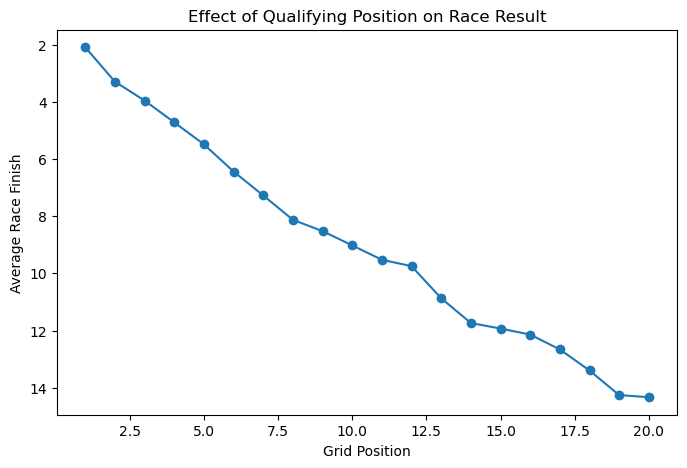

In [6]:
plt.figure(figsize=(8,5))
plt.plot(
    qualifying_effect['grid_position'],
    qualifying_effect['avg_finish'],
    marker='o'
)
plt.gca().invert_yaxis()
plt.xlabel("Grid Position")
plt.ylabel("Average Race Finish")
plt.title("Effect of Qualifying Position on Race Result")
plt.show()

In [7]:
top_consistent = (
    driver_consistency
    .sort_values('consistency_score', ascending=False)
    .head(10)
)

top_consistent[['forename','surname','races','finish_std']]

,forename,surname,races,finish_std
121,Max,Chilton,32,2.103904
111,Juan,Fangio,44,2.221722
110,Mike,Hawthorn,33,2.242834
120,Charles,Pic,30,2.246069
67,Philippe,Streiff,30,2.431593
131,Stoffel,Vandoorne,34,2.466351
100,Jo,Bonnier,50,2.574918
97,Jackie,Stewart,63,2.592972
51,Alain,Prost,143,2.605179
134,Antonio,Giovinazzi,56,2.721487


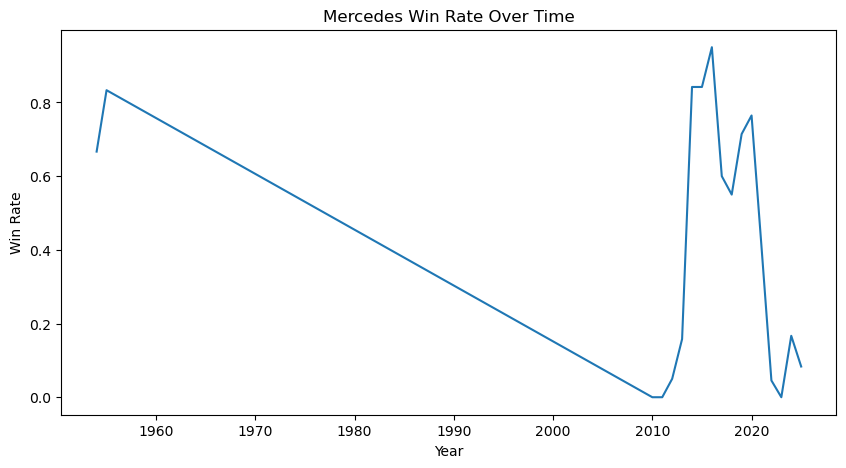

In [8]:
mercedes = constructor_dominance[
    constructor_dominance['constructor_name'] == 'Mercedes'
]

plt.figure(figsize=(10,5))
plt.plot(mercedes['year'], mercedes['win_rate'])
plt.xlabel("Year")
plt.ylabel("Win Rate")
plt.title("Mercedes Win Rate Over Time")
plt.show()

In [9]:
print(len(race_data))
print(len(driver_consistency))
print(len(constructor_dominance))

16285
146
972


In [10]:
## Constructor Dominance Across All Teams

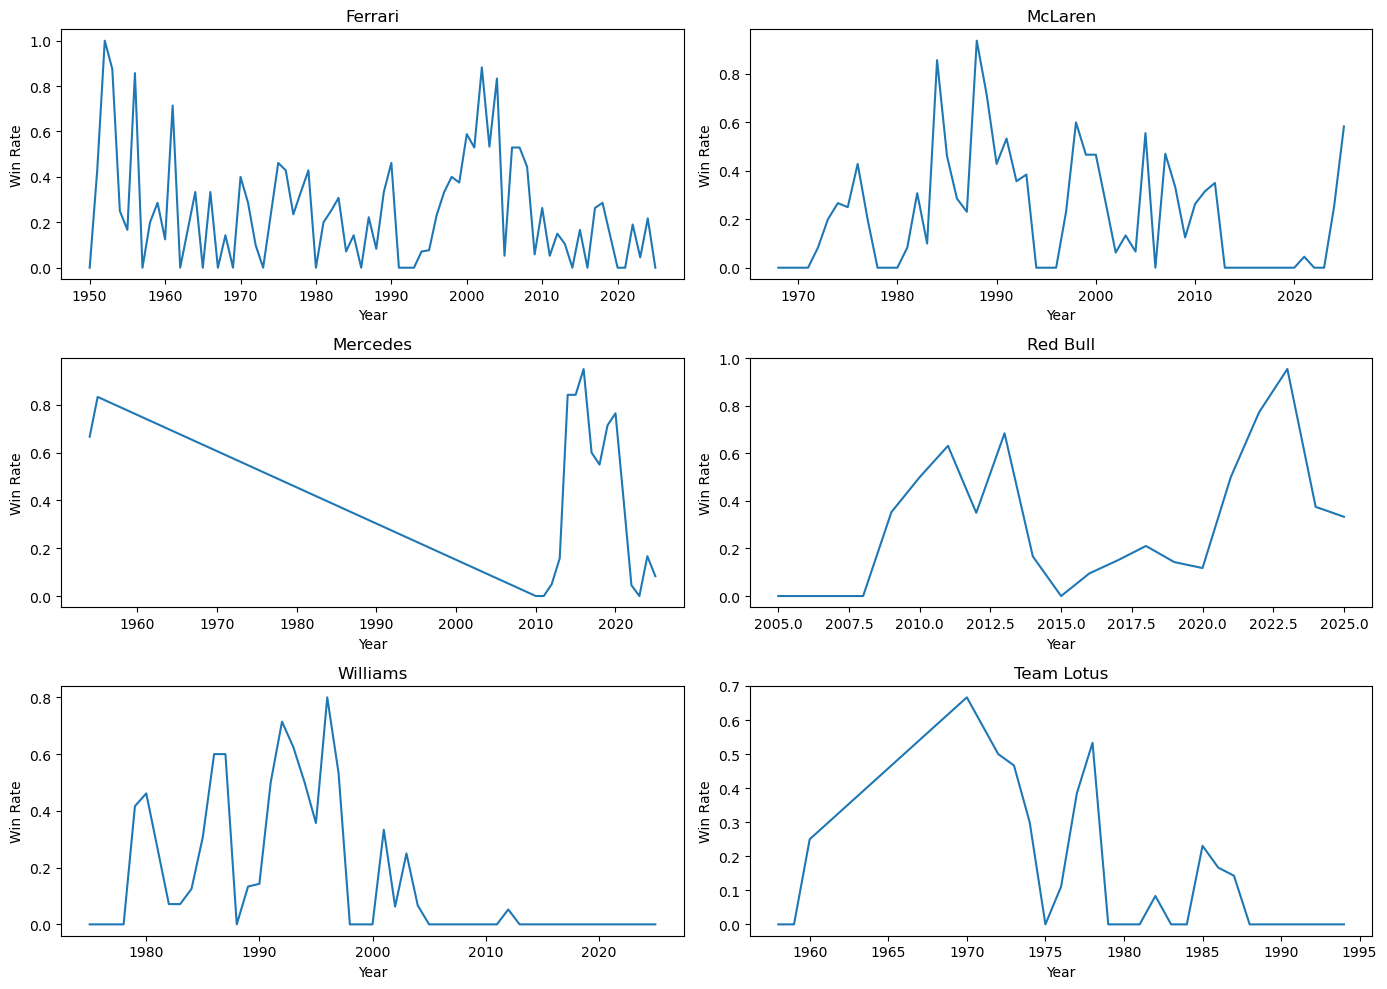

In [11]:
# Select top constructors by total wins
top_constructors = (
    constructor_dominance
    .groupby('constructor_name')['wins']
    .sum()
    .sort_values(ascending=False)
    .head(6)
    .index
)

fig, axes = plt.subplots(3, 2, figsize=(14,10))
axes = axes.flatten()

for ax, team in zip(axes, top_constructors):
    data = constructor_dominance[
        constructor_dominance['constructor_name'] == team
    ]
    ax.plot(data['year'], data['win_rate'])
    ax.set_title(team)
    ax.set_xlabel("Year")
    ax.set_ylabel("Win Rate")

plt.tight_layout()
plt.show()

In [12]:
## Constructor Dominance by Era

In [13]:
def era_label(year):
    if year < 1970:
        return "Early Era"
    elif year < 1990:
        return "Turbo / Transition Era"
    elif year < 2010:
        return "Refuelling Era"
    elif year < 2022:
        return "Hybrid Era"
    else:
        return "Ground Effect Era"

race_data['era'] = race_data['year'].apply(era_label)

In [14]:
race_data.rename(
    columns={'name_y': 'constructor_name'},
    inplace=True
)

In [15]:
race_data.rename(
    columns={'name_x': 'race_name'},
    inplace=True
)

In [16]:
'race_name' in race_data.columns, 'constructor_name' in race_data.columns

(True, True)

In [17]:
era_dominance = (
    race_data
    .groupby(['era', 'constructor_name'])
    .agg(wins=('is_win', 'sum'))
    .reset_index()
)

era_totals = (
    race_data
    .groupby('era')
    .agg(total_wins=('is_win', 'sum'))
    .reset_index()
)

era_dominance = era_dominance.merge(
    era_totals, on='era'
)

era_dominance['era_win_share'] = (
    era_dominance['wins'] / era_dominance['total_wins']
)

In [18]:
era_dominance.sort_values(
    ['era', 'era_win_share'],
    ascending=[True, False]
).groupby('era').head(3)

,era,constructor_name,wins,total_wins,era_win_share
32,Early Era,Ferrari,43,187,0.229947
48,Early Era,Lotus-Climax,22,187,0.117647
6,Early Era,BRM,13,187,0.069519
91,Ground Effect Era,Red Bull,55,92,0.597826
88,Ground Effect Era,McLaren,20,92,0.217391
86,Ground Effect Era,Ferrari,10,92,0.108696
108,Hybrid Era,Mercedes,115,237,0.485232
110,Hybrid Era,Red Bull,69,237,0.291139
99,Hybrid Era,Ferrari,28,237,0.118143
125,Refuelling Era,Ferrari,113,336,0.336310
